In [1]:

# library imports

import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import fuzzywuzzy
from fuzzywuzzy import process
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings('ignore')
import re

import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo

from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins


# import chardet

# from nltk.tokenize import RegexpTokenizer
# from stop_words import get_stop_words
# from wordcloud import WordCloud, STOPWORDS
#viz

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
business_path = '../Data/yelp_academic_dataset_business.json'

In [3]:
business = pd.read_json(business_path, lines=True)

In [4]:
print("\n================================Display of the raw business data of Yelp dataset===========================\n")
business.head()


================================Display of the raw business data of Yelp dataset===========================



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
print("\n============================Display of the columns in business data of Yelp dataset=======================\n")
business.columns



============================Display of the columns in business data of Yelp dataset=======================



Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [6]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()


In [7]:
# !conda install -c conda-forge basemap-data-hires --yes

In [8]:

# !brew install proj
# !brew install geos
# !pip install git+https://github.com/jswhit/pyproj.git

In [9]:

# !pip install Basemap
# !pip install matplotlib==3.1.3

In [10]:
#!pip install --upgrade numpy


In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# %matplotlib inline

In [12]:
#imports for Basemap
import os
# !conda install basemap
# !conda install mpl_toolkits.basemap
# !conda install -c conda-forge basemap-data-hires --yes
os.environ['PROJ_LIB'] = 'C:/Users/shouv/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap

# used to fix a n error conda install -c conda-forge basemap-data-hires --yes

In [13]:

# Reducing it down to only the North American region 
long_min, long_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

index_NA = (business["longitude"]>long_min) &\
            (business["longitude"]<long_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)
#apply the selector to subset
NA_business_yelp=business[index_NA ]

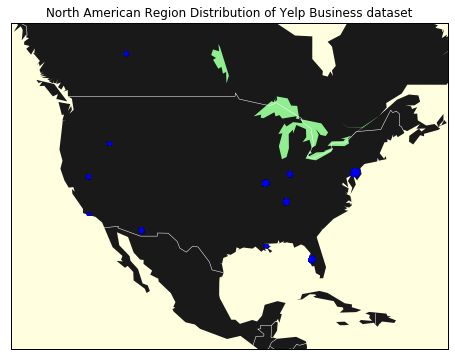

In [46]:
#figure initialization
plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=long_min,
             urcrnrlon=long_max,
             lat_ts=35,
            )

m2.fillcontinents(color='#191919',lake_color='lightGreen') 
m2.drawmapboundary(fill_color='lightYellow')                
m2.drawcountries(linewidth=0.5, color="w")              # thin white line for country borders

# Plotting the data
mxy = m2(NA_business_yelp["longitude"].tolist(), NA_business_yelp["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="blue", lw=0, alpha=0.05, zorder=5)

plt.title("North American Region Distribution of Yelp Business dataset")
plt.savefig('./images/business_distribution.png')

Evaluating the different features and checking on null values or duplicate entries:


In [15]:
print("\nDisplay of the column 'categories' no of null rows : ", business.categories.isnull().sum())

#filling the null values with " " empty string
business.categories = business.categories.fillna(" ")


Display of the column 'categories' no of null rows :  103


In [16]:

#Checking whether there are any duplicate entries
business.business_id.describe()


count                     150346
unique                    150346
top       RqZhYS6HOxMt32zk_ChI7g
freq                           1
Name: business_id, dtype: object

Hence, there are no duplicate entries as there are no recurring business ids

In [17]:

complete_business = business.assign(categories = business.categories.str.split(', ')).explode('categories')
category = complete_business.categories.value_counts()
category = category.to_frame().reset_index()
category.columns = ['Categories', 'Count']
print("\n============================Displaying the different business categories present on Yelp=======================\n")
category



============================Displaying the different business categories present on Yelp=======================



,Categories,Count
0,Restaurants,52268
1,Food,27781
2,Shopping,24395
3,Home Services,14356
4,Beauty & Spas,14292
...,...,...
1307,Faith-based Crisis Pregnancy Centers,1
1308,Sport Equipment Hire,1
1309,Karaoke Rental,1
1310,Hainan,1


We can see that there are a total of 1311 categories of various different businesses.

In [18]:
category= category.sort_values(by = 'Count', ascending = False)

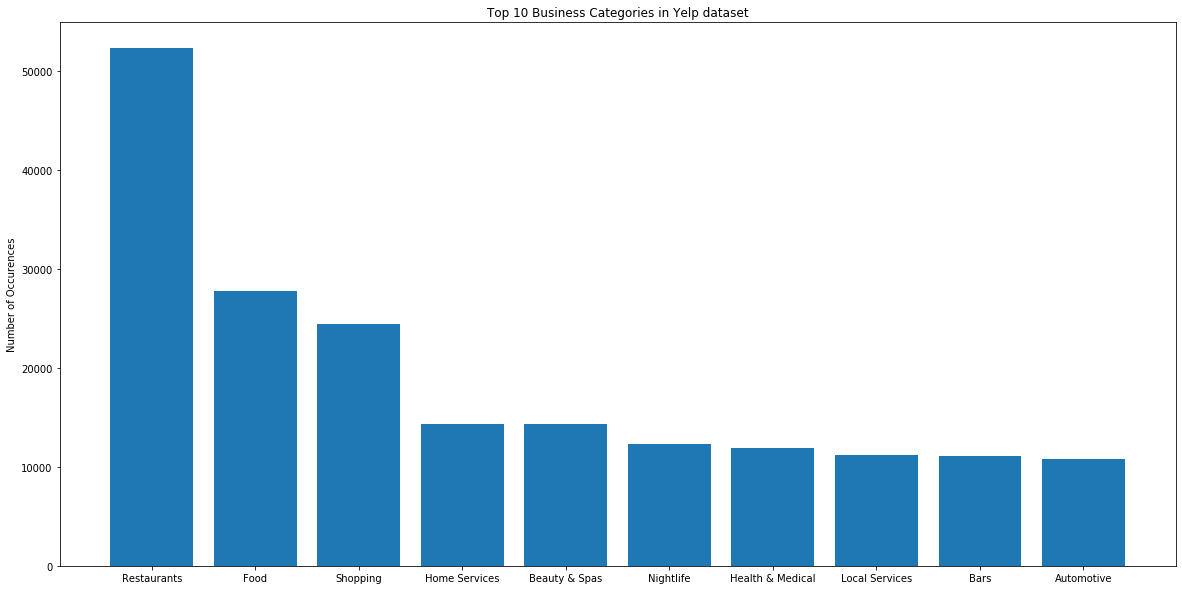

In [19]:

category = category[0:10]
objects = list(category.Categories)
y_pos = np.arange(len(objects))
Numbers = list(category.Count)

fig = plt.figure(figsize=(20,10))
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Top 10 Business Categories in Yelp dataset')
plt.savefig('./images/top_10_business_categories.png')

We could infer that most of the data is based on the Restaurant and Food business therefore this dataset would be a good pick to recommend restaurants to various users. We would also now filter out 'Restaurant' or 'Food' in their categories column and store it in a dataframe as we narrow down towards the required datafram for our Restaurant recommendation system.

Extracting now only the Restaurant and Food businesses from Yelp dataset:

In [20]:
# creating a dataframe to store all the records which has 'Restaurants' or 'Food' in their categories column 
restaurant_dataframe = pd.DataFrame()
for i in business.index:
    if 'Restaurants' in business.categories[i] or 'Food' in business.categories[i]:
        restaurant_dataframe =restaurant_dataframe.append(business.iloc[i])

In [21]:

restaurant_dataframe = restaurant_dataframe.reset_index(drop=True)
restaurant_dataframe.info()
restaurant_dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64616 entries, 0 to 64615
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       64616 non-null  object 
 1   attributes    63740 non-null  object 
 2   business_id   64616 non-null  object 
 3   categories    64616 non-null  object 
 4   city          64616 non-null  object 
 5   hours         55281 non-null  object 
 6   is_open       64616 non-null  float64
 7   latitude      64616 non-null  float64
 8   longitude     64616 non-null  float64
 9   name          64616 non-null  object 
 10  postal_code   64616 non-null  object 
 11  review_count  64616 non-null  float64
 12  stars         64616 non-null  float64
 13  state         64616 non-null  object 
dtypes: float64(5), object(9)
memory usage: 6.9+ MB


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,935 Race St,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1.0,39.955505,-75.155564,St Honore Pastries,19107,80.0,4.0,PA
1,101 Walnut St,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...",mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food",Green Lane,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",1.0,40.338183,-75.471659,Perkiomen Valley Brewery,18054,13.0,4.5,PA
2,615 S Main St,"{'BusinessParking': 'None', 'BusinessAcceptsCr...",CF33F8-E6oudUQ46HnavjQ,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",Ashland City,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",1.0,36.269593,-87.058943,Sonic Drive-In,37015,6.0,2.0,TN
3,8025 Mackenzie Rd,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...",k0hlBqXX-Bt0vf1op7Jr1w,"Pubs, Restaurants, Italian, Bars, American (Tr...",Affton,None,0.0,38.565165,-90.321087,Tsevi's Pub And Grill,63123,19.0,3.0,MO
4,2312 Dickerson Pike,"{'RestaurantsAttire': ''casual'', 'Restaurants...",bBDDEgkFA1Otx9Lfe7BZUQ,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",Nashville,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",1.0,36.208102,-86.768170,Sonic Drive-In,37207,10.0,1.5,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,1181 N Milwaukee St,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...",cM6V90ExQD6KMSU3rRB5ZA,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",Boise,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '...",1.0,43.615401,-116.284689,Dutch Bros Coffee,83704,33.0,4.0,ID
64612,11177 N Oracle Rd,"{'BusinessParking': '{'garage': False, 'street...",1jx1sfgjgVg0nM6n3p0xWA,"Specialty Food, Food, Coffee & Tea, Coffee Roa...",Oro Valley,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",1.0,32.409552,-110.943073,Savaya Coffee Market,85737,41.0,4.5,AZ
64613,1108 S 9th St,"{'WheelchairAccessible': 'False', 'Restaurants...",WnT9NIzQgLlILjPT0kEcsQ,"Restaurants, Mexican",Philadelphia,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1.0,39.935982,-75.158665,Adelita Taqueria & Restaurant,19147,35.0,4.5,PA
64614,4405 Pennell Rd,"{'RestaurantsDelivery': 'False', 'BusinessAcce...",2O2K6SXPWv56amqxCECd4w,"Restaurants, Comfort Food, Food, Food Trucks, ...",Aston,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1.0,39.856185,-75.427725,The Plum Pit,19014,14.0,4.5,DE


In [22]:
# display of the attributes column of the restaurant datadframe created
restaurant_dataframe['attributes'][0]


{'RestaurantsDelivery': 'False',
 'OutdoorSeating': 'False',
 'BusinessAcceptsCreditCards': 'False',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
 'BikeParking': 'True',
 'RestaurantsPriceRange2': '1',
 'RestaurantsTakeOut': 'True',
 'ByAppointmentOnly': 'False',
 'WiFi': "u'free'",
 'Alcohol': "u'none'",
 'Caters': 'True'}

In [23]:
# Taking into the consideration the restaurant businesses which are open
# 1 = open, 0 = closed
restaurant_dataframe = restaurant_dataframe[restaurant_dataframe['is_open']==1]


In [24]:
# Considering US states only

states = pd.Series(["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"])

Graphical display of average rating stars given to the Restaurants across each state in US:

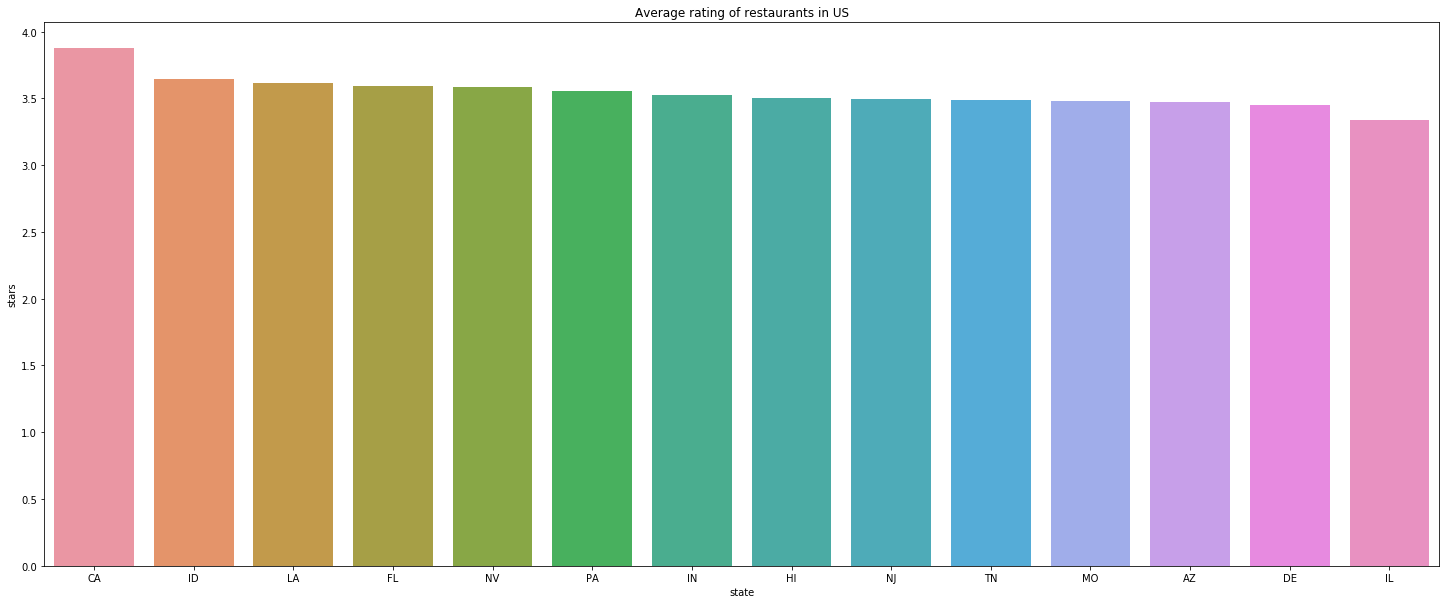

In [25]:
avg_stars = pd.pivot_table(restaurant_dataframe[restaurant_dataframe['state'].isin(states)] , index = ['state'], 
                    values = ['stars'], aggfunc = np.mean)

avg_stars=avg_stars.sort_values('stars',ascending=False)

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
a = sns.barplot(x=avg_stars.index, y="stars", data=avg_stars)
plt.title('Average rating of restaurants in US')
plt.savefig('./images/average_rating_of_US_states.png')

Distribution of restaurants state-wise in the dataframe:

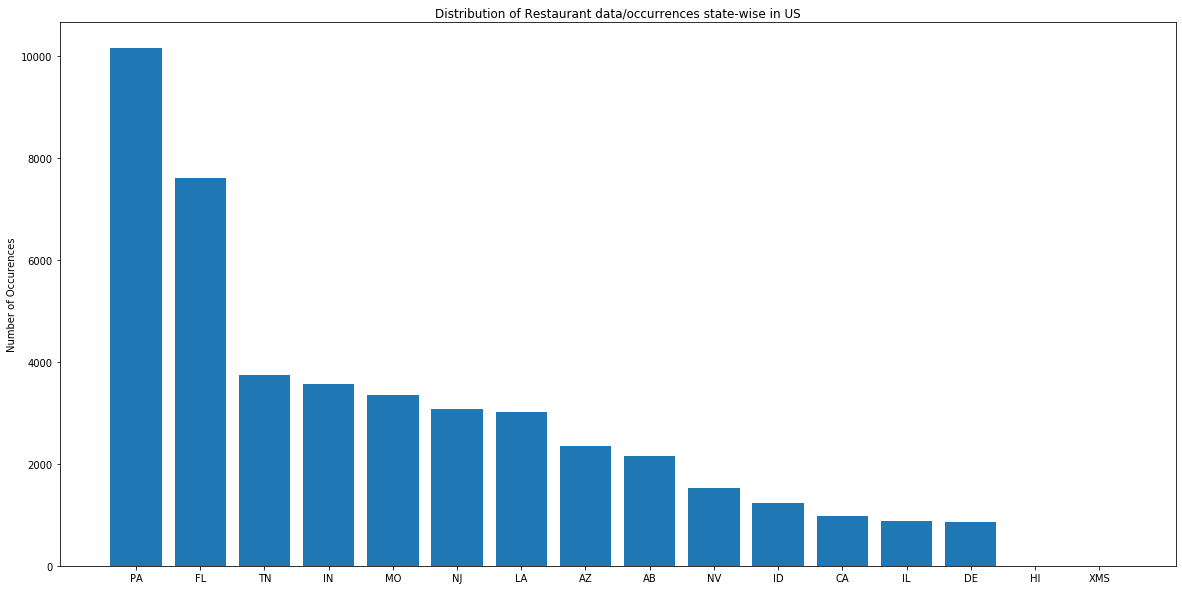

In [26]:

state_count = restaurant_dataframe.state.value_counts()

state_count = state_count.to_frame().reset_index()
state_count.columns = ['State', 'Counts']

objects = list(state_count.State)
y_pos = np.arange(len(objects))
Numbers = list(state_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of Restaurant data/occurrences state-wise in US')
plt.savefig('./images/state-wise_restaurant_distribution_in_US.png')

From this, graph, we could statewise distribution of restaurants. As we can see, this data consists of restaurants present all over, fornour analysis we would take the restaurants in California.

Analysis of restaurants in California state only:

In [27]:

business_in_CA = restaurant_dataframe[restaurant_dataframe.state == 'CA']
business_in_CA = business_in_CA.reset_index(drop = True)
print("\n============================Display of the restaurant businesses in California only=======================\n")
business_in_CA.head()



============================Display of the restaurant businesses in California only=======================



,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,"131 Anacapa St, Ste C","{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...",IDtLPgUrqorrpqSLdfMhZQ,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",Santa Barbara,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",1.0,34.414445,-119.690672,Helena Avenue Bakery,93101,389.0,4.0,CA
1,230 Stearns Wharf,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...",SZU9c8V2GuREDN5KgyHFJw,"Live/Raw Food, Restaurants, Seafood, Beer Bar,...",Santa Barbara,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",1.0,34.408715,-119.685019,Santa Barbara Shellfish Company,93101,2404.0,4.0,CA
2,2733 De La Vina St,"{'Alcohol': 'u'none'', 'BusinessAcceptsCreditC...",ifjluUv4VASwmFqEp8cWlQ,"Pizza, Restaurants",Santa Barbara,"{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2...",1.0,34.436236,-119.726147,Marty's Pizza,93105,64.0,4.0,CA
3,"7320 Hollister Ave, Ste 1","{'RestaurantsGoodForGroups': 'True', 'Business...",VeFfrEZ4iWaecrQg6Eq4cg,"Burgers, Cafes, Restaurants, Mexican, American...",Goleta,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ...",1.0,34.430542,-119.882367,Cal Taco,93117,189.0,4.0,CA
4,903 Embarcadero Del Norte,"{'RestaurantsDelivery': 'True', 'BikeParking':...",bdfZdB2MTXlT6-RBjSIpQg,"Food, Restaurants, Chinese, Bubble Tea, Vietna...",Isla Vista,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1.0,34.412934,-119.855531,Pho Bistro,93117,184.0,3.0,CA



The 'attributes' column here contains features which we can use to make the recommendations more suitable therefore this column is further spread out into difffrent attribute columns:

In [28]:
def find_superset_of_column_names(data):
    column_names = set()
    
    for line_contents in data:
        column_names.update(
                set(find_column_names(line_contents))
                )
    return column_names

def find_column_names(line_contents):
    column_names = []
    if line_contents is None:
        return ''
    for k in line_contents.keys():
        column_names.append('{0}'.format(k)
        )
    
    return column_names


In [29]:
superset_cols = find_superset_of_column_names(business_in_CA.attributes)

# put all those columns in the dataset and initilize them to nan
for col in superset_cols:
    business_in_CA[col]= np.nan

idx = 0
for attr in business_in_CA.attributes:
    if attr is None:
        idx+=1
        continue
    for k,v in attr.items():
        if'{' in v:
            continue
        business_in_CA[k][idx] = v
    idx+=1


In [30]:

null_val = pd.DataFrame(business_in_CA.isna().sum())
print("Null values: ",null_val)
print("Shape of original data", business_in_CA.shape)
business_in_CA.info()


Null values:                                0
address                       0
attributes                   13
business_id                   0
categories                    0
city                          0
hours                        75
is_open                       0
latitude                      0
longitude                     0
name                          0
postal_code                   0
review_count                  0
stars                         0
state                         0
DietaryRestrictions         986
OutdoorSeating              333
CoatCheck                   900
RestaurantsCounterService   984
Alcohol                     406
DriveThru                   843
GoodForMeal                 983
GoodForDancing              922
AcceptsInsurance            985
Open24Hours                 985
Corkage                     857
RestaurantsAttire           496
BestNights                  986
BusinessAcceptsBitcoin      771
RestaurantsReservations     416
DogsAllowed               

Dropping the columns with maximum number of null values:

In [31]:
col_del = list(null_val[null_val.iloc[:,0] >300].index)# columns to keep
col_del

business_in_CA.drop(columns=col_del).isna().sum()
business_in_CA = business_in_CA.drop(columns=col_del)
business_in_CA


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,BikeParking,Caters,RestaurantsTakeOut
0,"131 Anacapa St, Ste C","{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...",IDtLPgUrqorrpqSLdfMhZQ,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",Santa Barbara,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",1.0,34.414445,-119.690672,Helena Avenue Bakery,93101,389.0,4.0,CA,True,2.0,None,True,True,True
1,230 Stearns Wharf,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...",SZU9c8V2GuREDN5KgyHFJw,"Live/Raw Food, Restaurants, Seafood, Beer Bar,...",Santa Barbara,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",1.0,34.408715,-119.685019,Santa Barbara Shellfish Company,93101,2404.0,4.0,CA,True,2.0,True,True,False,True
2,2733 De La Vina St,"{'Alcohol': 'u'none'', 'BusinessAcceptsCreditC...",ifjluUv4VASwmFqEp8cWlQ,"Pizza, Restaurants",Santa Barbara,"{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2...",1.0,34.436236,-119.726147,Marty's Pizza,93105,64.0,4.0,CA,True,2.0,True,NaN,NaN,True
3,"7320 Hollister Ave, Ste 1","{'RestaurantsGoodForGroups': 'True', 'Business...",VeFfrEZ4iWaecrQg6Eq4cg,"Burgers, Cafes, Restaurants, Mexican, American...",Goleta,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ...",1.0,34.430542,-119.882367,Cal Taco,93117,189.0,4.0,CA,True,1.0,True,True,True,True
4,903 Embarcadero Del Norte,"{'RestaurantsDelivery': 'True', 'BikeParking':...",bdfZdB2MTXlT6-RBjSIpQg,"Food, Restaurants, Chinese, Bubble Tea, Vietna...",Isla Vista,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1.0,34.412934,-119.855531,Pho Bistro,93117,184.0,3.0,CA,True,1.0,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,5701 Calle Real,"{'ByAppointmentOnly': 'False', 'Alcohol': 'u'b...",2xxkaRy7rP5EUyjFt2J5kA,"Restaurants, Japanese, Ramen",Goleta,"{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",1.0,34.440885,-119.823523,Nikka Ramen,93117,562.0,4.5,CA,True,2.0,True,True,False,True
982,919 Linden Ave,None,8IV78gQwTH-eZgbfFS_plg,"Home Decor, Home & Garden, Coffee & Tea, Food,...",Carpinteria,None,1.0,34.398568,-119.519034,Lost & Found Cafe,93013,5.0,5.0,CA,NaN,NaN,NaN,NaN,NaN,NaN
983,,"{'BikeParking': 'False', 'RestaurantsPriceRang...",IRBhPAC4ZoDpXazpoB3epQ,"Food, Food Delivery Services, Bakeries, Desser...",Santa Barbara,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1.0,34.420334,-119.710749,Good Stuff Baked Treats,93101,9.0,5.0,CA,True,2.0,True,False,True,True
984,2012 De La Vina St,"{'BusinessParking': '{'garage': False, 'street...",Bo-GGwQNcLVwyKeYkbfAYg,"Event Planning & Services, Wine Tasting Room, ...",Santa Barbara,"{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ...",1.0,34.429154,-119.717222,Vino Divino,93105,19.0,5.0,CA,True,2.0,False,True,False,False


Splitting the contents in 'category' attribute

In [32]:
business_in_CA.shape

(986, 20)

In [33]:
category_elements = []
for i in business_in_CA.index:
    elements = business_in_CA.categories[i].split(',')
    for element in elements:
        category_elements.append(element)


In [34]:

category_elements = [x.strip(' ') for x in category_elements]
category_elements

['Food',
 'Restaurants',
 'Salad',
 'Coffee & Tea',
 'Breakfast & Brunch',
 'Sandwiches',
 'Bakeries',
 'Live/Raw Food',
 'Restaurants',
 'Seafood',
 'Beer Bar',
 'Beer',
 'Wine & Spirits',
 'Bars',
 'Food',
 'Nightlife',
 'Pizza',
 'Restaurants',
 'Burgers',
 'Cafes',
 'Restaurants',
 'Mexican',
 'American (Traditional)',
 'Food',
 'Restaurants',
 'Chinese',
 'Bubble Tea',
 'Vietnamese',
 'Chicken Wings',
 'Salad',
 'Restaurants',
 'Pizza',
 'Italian',
 'Sandwiches',
 'Coffee & Tea',
 'Coffee Roasteries',
 'Food',
 'Restaurants',
 'Thai',
 'Beer',
 'Wine & Spirits',
 'Pubs',
 'Arts & Entertainment',
 'Kombucha',
 'Nightlife',
 'Wineries',
 'Food',
 'Bars',
 'Beer Bar',
 'Themed Cafes',
 'Cafes',
 'Pets',
 'Arts & Entertainment',
 "Women's Clothing",
 'Coffee & Tea',
 'Shopping',
 'Pet Adoption',
 'Fashion',
 'Pet Sitting',
 'Accessories',
 'Pet Stores',
 'Pet Services',
 'Food',
 'Restaurants',
 'Food',
 'Food Delivery Services',
 'Burgers',
 'Pizza',
 'Caterers',
 'Event Planning & S

In [35]:
features = Counter(category_elements).most_common(20)
feature = [x[0] for x in features]

for col in feature:
    business_in_CA[col]= np.nan
for i in feature:
    for index in business_in_CA.index:
        
        if i in business_in_CA.categories[index]:
            business_in_CA[i][index] = 1
        else:
            business_in_CA[i][index] = 0

In [36]:

(business_in_CA.columns)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'RestaurantsDelivery', 'BikeParking',
       'Caters', 'RestaurantsTakeOut', 'Restaurants', 'Food', 'Nightlife',
       'Bars', 'Breakfast & Brunch', 'Coffee & Tea', 'Sandwiches', 'Mexican',
       'American (New)', 'Event Planning & Services', 'American (Traditional)',
       'Beer', 'Wine & Spirits', 'Arts & Entertainment', 'Specialty Food',
       'Shopping', 'Burgers', 'Wineries', 'Grocery', 'Pizza'],
      dtype='object')

In [37]:

## Checking for inconsistent city names
cities = business_in_CA['city'].unique()
cities


array(['Santa Barbara', 'Goleta', 'Isla Vista', 'Carpinteria',
       'Montecito', 'Port Hueneme', 'Summerland', 'Santa  Barbara',
       'Truckee', 'Santa Maria'], dtype=object)

In [38]:
## There only city with inconsistent name is Saint Joseph, so we will update that
business_in_CA['city'] = business_in_CA['city'].str.lower()
business_in_CA['city'] = business_in_CA['city'].str.strip()

def replace_matches(df, column, string_to_match, min_ratio = 80):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    rows_with_matches = df[column].isin(close_matches)
    df.loc[rows_with_matches, column] = string_to_match
    
for city in cities:
    replace_matches(business_in_CA, column='city', string_to_match=city)

business_in_CA['city'].unique()


array(['Santa  Barbara', 'Goleta', 'Isla Vista', 'Carpinteria',
       'Montecito', 'Port Hueneme', 'Summerland', 'Truckee',
       'Santa Maria'], dtype=object)

In [39]:
city_CA = business_in_CA.city.value_counts()
city_CA = city_CA.to_frame().reset_index()
city_CA.columns = ['City', 'Counts']

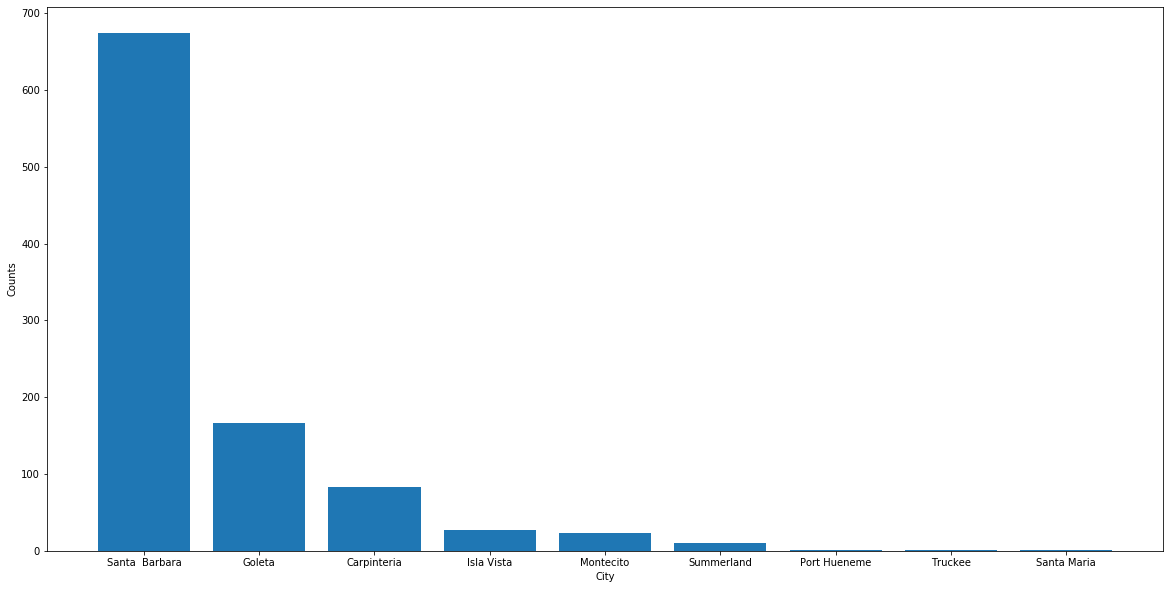

In [40]:
### Distribuiton of restaurant business in California
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(city_CA.City, city_CA.Counts, align = 'center', alpha = 1)
plt.xlabel("City")
plt.ylabel("Counts")
plt.savefig('./images/California_city_wise_restaurant_counts.png')

From the above graph we could see that are data is very skewed data based on the cities which have the restaurant reviews

Analysing Restaurants in California who got 5-star ratings and their count:

In [44]:
# import json
# reviews = []
# # path_rev = '/content/drive/MyDrive/CMPE256/Data/yelp_academic_dataset_review.json'
path_rev = '../Data/yelp_academic_dataset_review.json'
# with open(path_rev,encoding="utf8") as f:
#     for line in f:
#         reviews.append(json.loads(line))
reviews = pd.read_json(path_rev, lines=True)

ValueError: Expected object or value

In [ ]:
reviews = pd.DataFrame(reviews)
business_ratings = pd.merge(business_in_CA, reviews[['review_id', 'business_id', 'stars']], on = 'business_id', how = 'left')
Five_star = business_ratings[business_ratings['stars_y'] == 5.0]
Five_star_rating = Five_star.name.value_counts()
Five_star_rating = Five_star_rating.to_frame().reset_index()
Five_star_rating.columns = ['Restaurant', 'Counts']
Five_star_rating = Five_star_rating.head(10)
Five_star_rating = Five_star_rating.sort_values(['Counts'], ascending = True)
Five_star_rating


In [ ]:

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
plt.barh(Five_star_rating.Restaurant, Five_star_rating.Counts, align = 'center', alpha = 1)
plt.ylabel('Restaurant name')
plt.xlabel('Number of 5 star ratings')
plt.savefig('./images/5Star_ratings_restaurant_distribution_in_California.png')

From the above analysis we could infer that the restaurant Los Agaves got the highest amount of 5-star ratings in California.

Analysing Restaurants in California who got the most reviews:

In [ ]:
ids = business_in_CA.business_id.to_list()
review_CA = reviews[reviews.business_id.isin(ids)]
review_CA = pd.merge(review_CA, business_in_CA[['business_id', 'name']], on = 'business_id', how = 'left')

Top 10 most reviewed restaurants in California:


In [ ]:
top10_most_reviewed = review_CA.name.value_counts()
top10_most_reviewed = top10_most_reviewed.to_frame().reset_index()
top10_most_reviewed = top10_most_reviewed.head(10)
top10_most_reviewed.columns = ['name', 'Counts']
top10_most_reviewed = top10_most_reviewed.sort_values(['Counts'], ascending = True)
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
plt.barh(top10_most_reviewed.name, top10_most_reviewed.Counts, align = 'center', alpha = 1)
plt.ylabel('Restaurant name')
plt.xlabel('Top 10 reviewed Restaurants')
plt.savefig('./images/most_reviewed_restaurants_in_CA.png')